In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator, export_graphviz, export_text

In [2]:
def entropy(column: pd.Series, base=None):  
    # Determine the fractions for all column values v
    fracties = column.value_counts(normalize=True, sort=False)
    base = 2 if base is None else base
    return -(fracties * np.log(fracties) / np.log(base)).sum()

def information_gain(df: pd.DataFrame, s: str, target: str):
    # calculate entropy of parent tabl
    entropy_parent = entropy(df[target])
    child_entropies = []
    child_weights = []
    # compute entropies of child tables
    for (label, p) in df[s].value_counts().items():
        child_df = df[df[s] == label]
        child_entropies.append(entropy(child_df[target]))
        child_weights.append(int(p))
        # calculate the difference between parent entropy and weighted child entropies
        return entropy_parent -np.average(child_entropies, weights=child_weights)

def best_split(df:pd.DataFrame, target: str):
    # retrieve all non-target column labels (the features))
    features = df.drop(axis=1,labels=target).columns
    # calculate the information gains for these features
    gains = [information_gain(df,feature,target) for feature in features]
    # return column with highest information gain
    return features[np.argmax(gains)], max(gains)

In [3]:
# Exercise 1. The Simpsons (Basic)
# A. Load the file from the Simpsons.
simpsons = pd.read_csv("The Simpsons.csv")
simpsonsOriginal = pd.read_csv("The Simpsons original.csv")

In [4]:
# B. Calculate the entropy of this table yourself. Write down the formula

print(entropy(simpsons.gender))
# -4/9 * math.log(4/9, 2) - 5/9 * math.log(5/9, 2) = 0.991076

tableE = -5/9 * math.log(5/9, 2) - 4/9 * math.log(4/9, 2)
print( -5/9 * math.log(5/9, 2) - 4/9 * math.log(4/9, 2))

0.9910760598382221
0.9910760598382222


In [5]:
# C. Calculate the gain for each column. Can you also calculate the gain for the last column?

print(best_split(simpsons, 'gender'))

        #Hair length:
#E(table) - 3/9*E(hair length<3) - 1/9*E(hair length between 3 and 5) - 5/9*E(hair length>5)
print(entropy(simpsons.gender) - math.log(3/9, 2) - math.log(1/9, 2) - math.log(5/9, 2))

#E(hair length<3) = -(3/3) * math.log(3/3, 2) - 0/3 * math.log(0/3, 2) = 0
#E(hair length between 3 and 5) = -(1/1) * math.log(1/1, 2) - 0/1 * math.log(0/1, 2) = 0
#E(hair length>5) = -(3/5) * math.log(3/5, 2) - 2/5 * math.log(2/5, 2)
print(-(3/5) * math.log(3/5, 2) - 2/5 * math.log(2/5, 2))

#------------= 0.4516591--------------
print(tableE - 3/9*0 - 1/9*0 - 5/9*0.9709506)

        #Weight:
#E(table) - 5/9*E(weight<=160) - 4/9*E(Weight>160)

#E(weight<=160) = -(1/5) * math.log(1/5, 2) - 4/5 * math.log(4/5, 2) 
print(-(1/5) * math.log(1/5, 2) - 4/5 * math.log(4/5, 2) )

#E(Weight>160) = -(0/4) * math.log(0/4, 2) - 4/4 * math.log(4/4, 2)
# print(-(4/4) * math.log(4/4, 2) - 0/4 * math.log(0/4, 2))

#--------------= 0.590005----------
print(0.991076 - 5/9*0.721928 - 4/9*0) 

        #Age:
#E(table) - 3/9*E(age<30) - 3/9*E(age between 30 and 40) - 3/9*E(age>40)

#E(age<30) = -(2/3) * math.log(2/3, 2) - 1/3 * math.log(1/3, 2)
#E(age between 30 and 40) = -(1/3) * math.log(1/3, 2) - 2/3 * math.log(2/3, 2)
#E(age>40) = -(1/3) * math.log(1/3, 2) - 2/3 * math.log(2/3, 2)

print(-(2/3) * math.log(2/3, 2) - 1/3 * math.log(1/3, 2))
print(-(1/3) * math.log(1/3, 2) - 2/3 * math.log(2/3, 2))
print(-(1/3) * math.log(1/3, 2) - 2/3 * math.log(2/3, 2))

#--------------=0.07278------------
print(tableE - 3/9*0.9182958340544896 - 3/9*0.9182958340544896 - 3/9*0.9182958340544896)

        #Gender:
#E(table) - 5/9*E(gender=M) - 4/9*E(gender=F)
#E(gender=M) = -(5/5) * math.log(5/5, 2) - 0/5 * math.log(0/5, 2)
#E(gender=F) = -(4/4) * math.log(4/4, 2) - 0/4 * math.log(0/4, 2)

#--------0.991076 - 5/9*0 - 4/9*0 = 0.991076------------

('name', 0.9910760598382221)
6.5939604685566415
0.9709505944546686
0.4516590598382222
0.7219280948873623
0.5900048888888888
0.9182958340544896
0.9182958340544896
0.9182958340544896
0.07278022578373267


In [6]:
# D. Determine the sub-table where the weight is always <= 160.

def getWeightsSmaller160(df):
    return df.loc[df['weight'] == '<=160']

print(getWeightsSmaller160(simpsons))

#hair length weight age gender
#      >5    <=160 30-40   F
#      <3    <=160 <30     M
#      >5    <=160 <30     F
#      3-5   <=160 <30     F
#      >5    <=160 >40     F


     name hair length weight    age gender
1   Marge          >5  <=160  30-40      F
2    Bart          <3  <=160    <30      M
3    Lisa          >5  <=160    <30      F
4  Maggie         3-5  <=160    <30      F
6   Selma          >5  <=160    >40      F


In [7]:
# E. What is the entropy of this sub-table?

#=0.72192801
print(-(1/5) * math.log(1/5, 2) - 4/5 * math.log(4/5, 2) )


0.7219280948873623


In [8]:
# F. Determine the gain for each column of this sub-table. Which column do you choose for the next step?
        #Hair length:
#E(table) - 1/5*E(hair length<3) - 1/5*E(hair length 3-5) - 3/5*E(hair length>5)

#E(hair length>5) = -(3/3) * math.log(3/3, 2) - 0/3 * math.log(0/3, 2 ) = 0
#0.72192801 - 1/5*0 - 1/5*0 - 3/5*0 = 0.72192801
        
        #Age:
#E(table) - 3/5*E(age<30) - 1/5*E(age30-40) - 1/5*E(age>40)
#
#E(age<30) = -(1/3) * math.log(1/3, 2) - 2/3 * math.log(2/3, 2)
print(-(1/3) * math.log(1/3, 2) - 2/3 * math.log(2/3, 2))
#0.72192801 - 3/5*0.9182958 - 1/5*0 - 1/5*0
#=0,1709506
print(0.72192801 - 3/5*0.9182958 - 1/5*0 - 1/5*0)

        #Gender
#E(table) - 4/5*E(gender=F) - 1/5*E(gender=M)
#E(gender=F) = -(4/4) * math.log(4/4, 2) - 0/4 * math.log(0/4, 2) = 0
#E(gender=M) = -(1/1) * math.log(1/1, 2) - 0/1 * math.log(0/1, 2) = 0
#0.72192801 - 4/5*0 - 1/5*0
#=0.72192801

#Heads up: use the entropy of the sub-table (from question e)
#Hair length: 0,7219281 - 1/5*0 - 1/5*0 - 3/5*0 = 0,7219281
#Age: 0,7219281 - 3/5* - 1/5*0 - 1/5*0 = 0,1709506
#Gender: 0.72192801 - 4/5*0 - 1/5*0 = 0,7219281

#We choose hair length

0.9182958340544896
0.17095052999999993


In [9]:
# G. Create the treestructure in Pythonwith the given ID3 algorithm.
model = Id3Estimator()
# X = features, y = target
X = simpsonsOriginal.drop(['name', 'gender'], axis=1).values.tolist()
Y = simpsonsOriginal['gender'].values.tolist()
model.fit(X,Y)
print(export_text(model.tree_, feature_names=simpsonsOriginal.drop(['name', 'gender'], axis=1).columns))

#Solution:
# weight <= 165.00
# |   hair length <= 3.00: M(1)
# |   hair length > 3.00: F(4)
# weight > 165.00: M(4)



weight <=165.00
|   hair length <=3.00: M (1) 
|   hair length >3.00: F (4) 
weight >165.00: M (4) 



In [10]:
# H. How would the next Simpson be classified?hair length: 8, weight: 290, age: 38
#Male, the weight is over 160 (all weights > 160 = male)

In [11]:
# Export decision tree to disk
export_graphviz(model.tree_,'tree.png', feature_names=simpsonsOriginal.drop(['name', 'gender'], axis=1).columns)

dot = graphviz.Source.from_file('tree.png')
dot.render('tree', view=True)

newSimpson = np.array([[8,290,38]])
print(model.predict(newSimpson))

['M']


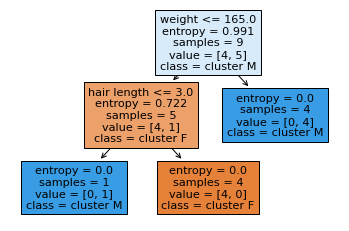

In [12]:
# I. Make the tree structure in Python with ID3Estimator. Do you get the same tree structure?
simpsons = pd.read_csv("The Simpsons original.csv")
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(simpsons.drop(['gender', 'name'], axis=1), simpsons['gender'])
tree.plot_tree(classifier, feature_names=simpsons.drop(['gender','name'],axis=1).columns.values,class_names=['cluster {}'.format(i) for i in np.unique(simpsons['gender'])], filled=True)
plt.show()